In [320]:
import pandas as pd

# Replace the path with your actual full path
file_path = "/Users/morischacter/Documents/QTM340/FP/FPL_tweets.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Preview the data
df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453


In [321]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/morischacter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/morischacter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/morischacter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [322]:
df

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114461,1.609460e+18,2023-01-01 08:05:36+00:00,SaintyLife,My FPL Gameweek 19 Kneejerk Reaction | Transfe...,NaN,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Capetown, South Ah!",False,321,503
114462,1.609400e+18,2023-01-01 04:11:09+00:00,defecamp,"@Jim_Keoghan Come on, he was my captain in fan...",NaN,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,False,24,130
114463,1.609380e+18,2023-01-01 02:55:30+00:00,JosiahUTD,@wapzzgo Fantasy Premier League,NaN,0,2,1,"<a href=""http://twitter.com/download/iphone"" r...",,False,1985,3535
114464,1.609340e+18,2023-01-01 00:14:48+00:00,RDijkot,"WOL vs MUN Dream11 Prediction, Fantasy Footbal...","['cricket', 'sports']",0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",los Angeles,False,1154,1266


In [323]:
import re
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text, replace='')                        # Remove emojis
    text = re.sub(r"http\S+|www.\S+", "", text)                         # Remove URLs
    text = re.sub(r"\S+@\S+", "", text)                                 # Remove emails
    text = re.sub(r"@\w+|#\w+", "", text)                               # Remove mentions/hashtags
    text = re.sub(r"[^\w\s]", "", text)                                 # Remove punctuation
    text = re.sub(r"\d+", "", text)                                     # Remove digits
    text = re.sub(r"\s+", " ", text).strip()                            # Clean whitespace
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [324]:
# Apply to 'Text' column
df["Clean_Text"] = df["Text"].apply(preprocess)

# Preview result
print(df[["Text", "Clean_Text"]].head())

                                                Text  \
0  I scored 75 points in Gameweek 20 on Fantasy P...   
1  110,525 have transferred Walcott into fantasy ...   
2  I scored 61 points in Gameweek 20 on Fantasy P...   
3  I scored 71 points in Gameweek 20 on Fantasy P...   
4  My life's ambition is to one week be the highe...   

                                          Clean_Text  
0       scored point gameweek fantasy premier league  
1  transferred walcott fantasy premier league sho...  
2       scored point gameweek fantasy premier league  
3       scored point gameweek fantasy premier league  
4  life ambition one week highest scorer fantasy ...  


In [325]:
df_sorted = df.sort_values(by='Timestamp')
display(df_sorted.head())

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Clean_Text
9999,2.627060e+17,2012-10-29 00:03:32+00:00,achmadkonde,I scored 45 points in Gameweek 9 on Fantasy Pr...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",jogja,False,197,303,scored point gameweek fantasy premier league
9998,2.627130e+17,2012-10-29 00:32:24+00:00,wahyusan666,I scored 23 points in Gameweek 9 on Fantasy Pr...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",Di Bumi Indonesia,False,186,375,scored point gameweek fantasy premier league
9997,2.627150e+17,2012-10-29 00:36:34+00:00,jazlanhamsan,haish.. teruk point fantasy premier league min...,['APTB'],0,0,0,"<a href=""https://about.twitter.com/products/tw...","ÜT: 2.9805094,101.5665355",False,264,742,haish teruk point fantasy premier league mingg...
9996,2.627150e+17,2012-10-29 00:37:58+00:00,FadJmldn,Fantasy Premier League.,NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",KL,False,245,295,fantasy premier league
9995,2.627200e+17,2012-10-29 00:56:39+00:00,11petratos,I scored 37 points in Gameweek 9 on Fantasy Pr...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...","Cardiff, Wales",False,101,62,scored point gameweek fantasy premier league


In [326]:
df_sorted['Timestamp'] = pd.to_datetime(df_sorted['Timestamp'], errors='coerce')

In [327]:
df_2022 = df_sorted[(df_sorted['Timestamp'] >= '2022-08-05') & (df_sorted['Timestamp'] <= '2023-05-28')].copy()

In [328]:
players_df

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,full_name
0,Granit,Xhaka,7,8,153,2992,35,673.3,647.0,498.0,15,634,182.0,13,0,4,2.7,48,MID,granit xhaka
1,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.6,41,MID,mohamed elneny
2,Rob,Holding,1,0,21,562,13,10.3,152.0,54.0,0,120,21.6,0,0,0,0.2,42,DEF,rob holding
3,Thomas,Partey,3,0,86,2480,28,439.6,513.2,240.0,6,468,119.5,11,0,5,0.4,47,MID,thomas partey
4,Martin,Ødegaard,15,8,212,3132,38,1100.4,960.0,920.0,30,813,298.3,13,0,4,33.3,69,MID,martin degaard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Matheus,Santos Carneiro Da Cunha,2,0,39,961,12,95.1,143.0,217.0,6,122,45.1,5,0,1,0.1,53,FWD,matheus santos carneiro da cunha
774,Mario,Lemina,0,1,35,1297,28,65.0,200.4,36.0,0,196,30.1,5,1,2,0.0,45,MID,mario lemina
775,Pablo,Sarabia,1,0,27,764,9,184.7,92.0,157.0,3,57,43.0,3,0,3,0.1,49,MID,pablo sarabia
776,Daniel,Bentley,0,0,6,180,3,0.0,70.2,0.0,0,45,7.0,0,0,0,0.0,40,GK,daniel bentley


In [329]:
# Load the uploaded cleaned_players.csv file
players_path = '/Users/morischacter/Documents/QTM340/FP/cleaned_players.csv'

players_df = pd.read_csv(players_path)

# Combine first and second names into a single full name and normalize
import unicodedata

def normalize_name(name):
    if not isinstance(name, str):
        return ""
    name = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('utf-8')
    return name.lower().replace('-', ' ').replace('*', '').strip()

# Create full name and normalize
players_df['full_name'] = players_df['first_name'] + ' ' + players_df['second_name']
players_df['full_name'] = players_df['full_name'].apply(normalize_name)

display(players_df)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,full_name
0,Granit,Xhaka,7,8,153,2992,35,673.3,647.0,498.0,15,634,182.0,13,0,4,2.7,48,MID,granit xhaka
1,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.6,41,MID,mohamed elneny
2,Rob,Holding,1,0,21,562,13,10.3,152.0,54.0,0,120,21.6,0,0,0,0.2,42,DEF,rob holding
3,Thomas,Partey,3,0,86,2480,28,439.6,513.2,240.0,6,468,119.5,11,0,5,0.4,47,MID,thomas partey
4,Martin,Ødegaard,15,8,212,3132,38,1100.4,960.0,920.0,30,813,298.3,13,0,4,33.3,69,MID,martin degaard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Matheus,Santos Carneiro Da Cunha,2,0,39,961,12,95.1,143.0,217.0,6,122,45.1,5,0,1,0.1,53,FWD,matheus santos carneiro da cunha
774,Mario,Lemina,0,1,35,1297,28,65.0,200.4,36.0,0,196,30.1,5,1,2,0.0,45,MID,mario lemina
775,Pablo,Sarabia,1,0,27,764,9,184.7,92.0,157.0,3,57,43.0,3,0,3,0.1,49,MID,pablo sarabia
776,Daniel,Bentley,0,0,6,180,3,0.0,70.2,0.0,0,45,7.0,0,0,0,0.0,40,GK,daniel bentley


In [330]:
matched = []

for player in players_df["full_name"]:
    mask = df_2022['Text'].str.contains(player, case=False, na=False)
    temp = df_2022[mask].copy()
    temp['full_name'] = player
    matched.append(temp)

df_matched = pd.concat(matched)

In [331]:
df_matched

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Clean_Text,full_name
103241,1.576200e+18,2022-10-01 13:32:53+00:00,AlexBatt,2022. The year Granit Xhaka became a legit Fan...,"['AFC', 'ARSTOT', 'Arsenal', 'FPL']",0,3,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Downham Market, England",True,2274,839,year granit xhaka became legit fantasy premier...,granit xhaka
102334,1.582700e+18,2022-10-19 11:53:01+00:00,SportBibleNews,🔔 | Arsenal midfielder Mohamed Elneny’s Fantas...,NaN,3,3,0,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",NaN,False,212201,5,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
102331,1.582710e+18,2022-10-19 12:13:01+00:00,KLmire,Arsenal midfielder Mohamed Elneny’s Fantasy Pr...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
108175,1.555650e+18,2022-08-05 20:32:50+00:00,LloydBruno3,Ano see Thomas Partey in anyone’s fantasy prem...,NaN,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,False,405,1067,ano see thomas partey anyones fantasy premier ...,thomas partey
112522,1.624020e+18,2023-02-10 12:23:32+00:00,iantambunan,Eddie Nketiah pemain Arsenal dgn big chances (...,"['FPL', 'FPLIndonesia', 'FPLCommunity']",0,0,0,"<a href=""http://twitter.com/download/android"" ...","Jakarta, Indonesia",False,154,39,eddie nketiah pemain arsenal dgn big chance te...,eddie nketiah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103017,1.577990e+18,2022-10-06 11:37:05+00:00,KLmire,"Fantasy Premier League: Why Phil Foden, Callum...",NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,fantasy premier league phil foden callum wilso...,jarrod bowen
112129,1.629030e+18,2023-02-24 07:49:32+00:00,XploreMediaUK,https://t.co/YoZdo6XtYW Fantasy Premier League...,"['Football', 'Sport']",0,0,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","Birmingham, England",False,1339,5001,fantasy premier league tip gameweek jarrod bow...,jarrod bowen
110706,1.642510e+18,2023-04-02 12:57:19+00:00,OfficialFPL,⚒️ Jarrod Bowen (£8.0m) has produced seven of ...,"['FPL', 'WHUSOU']",37,959,18,"<a href=""https://www.spredfast.com/"" rel=""nofo...",NaN,False,5125478,23,jarrod bowen produced seven nine attacking ret...,jarrod bowen
107397,1.557420e+18,2022-08-10 17:31:07+00:00,Brightfeed1,Fantasy Premier League: Why Gianluca Scamacca ...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,False,17,140,fantasy premier league gianluca scamacca squad,gianluca scamacca


In [332]:
import pandas as pd
import os

# Path to your local gws folder
gws_path = '/Users/morischacter/Documents/QTM340/FP/gws'

# Combine all 38 gameweek files into one DataFrame
weekly_dfs = []
for i in range(1, 39):
    file_path = os.path.join(gws_path, f'gw{i}.csv')
    gw_df = pd.read_csv(file_path)
    gw_df['week'] = i  # Add a gameweek column
    weekly_dfs.append(gw_df)

# Concatenate all weeks
weekly_df = pd.concat(weekly_dfs, ignore_index=True)
weekly_df = weekly_df.sort_values(by='name').reset_index(drop=True)
# Preview
display(weekly_df)

/var/folders/7k/frpq0s3563v5k3ws2wfvl4p00000gn/T/ipykernel_89747/1468703549.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  weekly_df = pd.concat(weekly_dfs, ignore_index=True)


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,week
0,Aaron Cresswell,DEF,West Ham,0.2,0,0,0,0,0.0,457,...,1,0.0,0,-4612,720,5332,47,True,0,27
1,Aaron Cresswell,DEF,West Ham,1.1,0,0,0,0,0.0,457,...,2,0.0,0,-33385,5180,38565,49,False,0,6
2,Aaron Cresswell,DEF,West Ham,1.2,0,0,15,0,10.4,457,...,1,5.0,2,-7347,4256,11603,48,False,0,20
3,Aaron Cresswell,DEF,West Ham,3.0,0,0,20,0,42.8,457,...,3,2.0,2,39911,49989,10078,48,True,0,10
4,Aaron Cresswell,DEF,West Ham,3.7,0,0,15,0,16.5,457,...,1,2.0,2,-5129,13737,18866,48,False,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26500,Çaglar Söyüncü,DEF,Leicester,-1.0,0,0,18,0,10.7,267,...,3,5.0,0,-89,69,158,42,False,1,31
26501,Çaglar Söyüncü,DEF,Leicester,0.0,0,0,0,0,0.0,267,...,5,0.0,0,-2192,1253,3445,43,False,0,6
26502,Çaglar Söyüncü,DEF,Leicester,0.7,0,0,9,0,0.7,267,...,1,6.0,2,420,563,143,42,False,0,33
26503,Çaglar Söyüncü,DEF,Leicester,-0.5,0,0,0,0,0.0,267,...,2,0.0,0,-6235,669,6904,44,False,0,4


In [333]:
import unicodedata

def remove_accents(name):
    if not isinstance(name, str):
        return name
    name = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('utf-8')
    return name.lower().replace('-', ' ').strip()

In [334]:
weekly_df['name'] = weekly_df['name'].apply(remove_accents)
df_matched['full_name'] = df_matched['full_name'].apply(remove_accents)

In [335]:
weekly_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,week
0,aaron cresswell,DEF,West Ham,0.2,0,0,0,0,0.0,457,...,1,0.0,0,-4612,720,5332,47,True,0,27
1,aaron cresswell,DEF,West Ham,1.1,0,0,0,0,0.0,457,...,2,0.0,0,-33385,5180,38565,49,False,0,6
2,aaron cresswell,DEF,West Ham,1.2,0,0,15,0,10.4,457,...,1,5.0,2,-7347,4256,11603,48,False,0,20
3,aaron cresswell,DEF,West Ham,3.0,0,0,20,0,42.8,457,...,3,2.0,2,39911,49989,10078,48,True,0,10
4,aaron cresswell,DEF,West Ham,3.7,0,0,15,0,16.5,457,...,1,2.0,2,-5129,13737,18866,48,False,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26500,caglar soyuncu,DEF,Leicester,-1.0,0,0,18,0,10.7,267,...,3,5.0,0,-89,69,158,42,False,1,31
26501,caglar soyuncu,DEF,Leicester,0.0,0,0,0,0,0.0,267,...,5,0.0,0,-2192,1253,3445,43,False,0,6
26502,caglar soyuncu,DEF,Leicester,0.7,0,0,9,0,0.7,267,...,1,6.0,2,420,563,143,42,False,0,33
26503,caglar soyuncu,DEF,Leicester,-0.5,0,0,0,0,0.0,267,...,2,0.0,0,-6235,669,6904,44,False,0,4


In [336]:
df_matched

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Clean_Text,full_name
103241,1.576200e+18,2022-10-01 13:32:53+00:00,AlexBatt,2022. The year Granit Xhaka became a legit Fan...,"['AFC', 'ARSTOT', 'Arsenal', 'FPL']",0,3,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Downham Market, England",True,2274,839,year granit xhaka became legit fantasy premier...,granit xhaka
102334,1.582700e+18,2022-10-19 11:53:01+00:00,SportBibleNews,🔔 | Arsenal midfielder Mohamed Elneny’s Fantas...,NaN,3,3,0,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",NaN,False,212201,5,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
102331,1.582710e+18,2022-10-19 12:13:01+00:00,KLmire,Arsenal midfielder Mohamed Elneny’s Fantasy Pr...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
108175,1.555650e+18,2022-08-05 20:32:50+00:00,LloydBruno3,Ano see Thomas Partey in anyone’s fantasy prem...,NaN,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,False,405,1067,ano see thomas partey anyones fantasy premier ...,thomas partey
112522,1.624020e+18,2023-02-10 12:23:32+00:00,iantambunan,Eddie Nketiah pemain Arsenal dgn big chances (...,"['FPL', 'FPLIndonesia', 'FPLCommunity']",0,0,0,"<a href=""http://twitter.com/download/android"" ...","Jakarta, Indonesia",False,154,39,eddie nketiah pemain arsenal dgn big chance te...,eddie nketiah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103017,1.577990e+18,2022-10-06 11:37:05+00:00,KLmire,"Fantasy Premier League: Why Phil Foden, Callum...",NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,fantasy premier league phil foden callum wilso...,jarrod bowen
112129,1.629030e+18,2023-02-24 07:49:32+00:00,XploreMediaUK,https://t.co/YoZdo6XtYW Fantasy Premier League...,"['Football', 'Sport']",0,0,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","Birmingham, England",False,1339,5001,fantasy premier league tip gameweek jarrod bow...,jarrod bowen
110706,1.642510e+18,2023-04-02 12:57:19+00:00,OfficialFPL,⚒️ Jarrod Bowen (£8.0m) has produced seven of ...,"['FPL', 'WHUSOU']",37,959,18,"<a href=""https://www.spredfast.com/"" rel=""nofo...",NaN,False,5125478,23,jarrod bowen produced seven nine attacking ret...,jarrod bowen
107397,1.557420e+18,2022-08-10 17:31:07+00:00,Brightfeed1,Fantasy Premier League: Why Gianluca Scamacca ...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,False,17,140,fantasy premier league gianluca scamacca squad,gianluca scamacca


In [337]:
requests.get("https://fantasy.premierleague.com/api/bootstrap-static/").json()["events"]

[{'id': 1,
  'name': 'Gameweek 1',
  'deadline_time': '2024-08-16T17:30:00Z',
  'release_time': None,
  'average_entry_score': 57,
  'finished': True,
  'data_checked': True,
  'highest_scoring_entry': 3546234,
  'deadline_time_epoch': 1723829400,
  'deadline_time_game_offset': 0,
  'highest_score': 127,
  'is_previous': False,
  'is_current': False,
  'is_next': False,
  'cup_leagues_created': False,
  'h2h_ko_matches_created': False,
  'can_enter': False,
  'can_manage': False,
  'released': True,
  'ranked_count': 8597356,
  'overrides': {'rules': {},
   'scoring': {},
   'element_types': [],
   'pick_multiplier': None},
  'chip_plays': [{'chip_name': 'bboost', 'num_played': 144974},
   {'chip_name': '3xc', 'num_played': 221430}],
  'most_selected': 401,
  'most_transferred_in': 27,
  'top_element': 328,
  'top_element_info': {'id': 328, 'points': 14},
  'transfers_made': 0,
  'most_captained': 351,
  'most_vice_captained': 351},
 {'id': 2,
  'name': 'Gameweek 2',
  'deadline_time':

In [338]:
import requests
import pandas as pd

# Get event data from FPL API
events = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/").json()['events']
event_df = pd.DataFrame([{
    'week': e['id'],
    'deadline': pd.to_datetime(e['deadline_time'])
} for e in events if e['id'] <= 38])

# Add start and end ranges for each gameweek
event_df['start'] = event_df['deadline'].shift(1).fillna(pd.Timestamp('2022-07-01'))
event_df['end'] = event_df['deadline']

In [339]:
event_df['start'] = event_df['deadline'].shift(1).fillna(pd.Timestamp('2022-07-01'))
event_df['end'] = event_df['deadline'] + pd.Timedelta(days=1)  # Buffer to catch all tweets

In [340]:
event_df['start'] = pd.to_datetime(event_df['start'], errors='coerce').dt.tz_localize(None)
event_df['end'] = pd.to_datetime(event_df['end'], errors='coerce').dt.tz_localize(None)

In [341]:
def assign_gameweek(ts):
    for _, row in event_df.iterrows():
        if row['start'] <= ts < row['end']:
            return row['week']
    return None


In [342]:
fixtures_df = pd.read_csv('/Users/morischacter/Documents/QTM340/FP/fixtures.csv')

# Convert kickoff_time to datetime
fixtures_df['kickoff_time'] = pd.to_datetime(fixtures_df['kickoff_time'], errors='coerce')

# Group by event (gameweek number) and find latest kickoff time for each
gw_calendar = fixtures_df.groupby('event')['kickoff_time'].max().reset_index()
gw_calendar = gw_calendar.rename(columns={'event': 'week', 'kickoff_time': 'end'})

# Define start as 7 days before the end (approximate gameweek window)
gw_calendar['start'] = gw_calendar['end'] - pd.Timedelta(days=7)

# Ensure timestamps are timezone-naive for safe comparison later
gw_calendar['start'] = gw_calendar['start'].dt.tz_localize(None)
gw_calendar['end'] = gw_calendar['end'].dt.tz_localize(None)


In [343]:
gw_calendar

,week,end,start
0,1,2022-08-07 15:30:00,2022-07-31 15:30:00
1,2,2022-08-15 19:00:00,2022-08-08 19:00:00
2,3,2022-08-22 19:00:00,2022-08-15 19:00:00
3,4,2022-08-28 15:30:00,2022-08-21 15:30:00
4,5,2022-09-01 19:00:00,2022-08-25 19:00:00
5,6,2022-09-04 15:30:00,2022-08-28 15:30:00
6,8,2022-09-18 13:15:00,2022-09-11 13:15:00
7,9,2022-10-03 19:00:00,2022-09-26 19:00:00
8,10,2022-10-10 19:00:00,2022-10-03 19:00:00
9,11,2022-10-16 15:30:00,2022-10-09 15:30:00


In [344]:
# from collections import defaultdict
weekly_player_tweets={}
#{"player1":{"week1":[tweets],"week2:[tweets]"}}
unique_players=df_matched["full_name"].unique()
for player in unique_players:
    weekly_player_tweets[player]={}
    curr_player=(df_matched[df_matched["full_name"]==player])
    unique_weeks=curr_player["week"].unique()
    for week in unique_weeks:
        curr_df=curr_player[curr_player["week"]==week]
        weekly_player_tweets[player][week]=(curr_df["Text"].tolist())
        
#unique count, which
#represents the total number of Tweets captured after de-duplication
unique_counts={}
#(6)total unique ratio, which represents the ratio between total and unique counts.
for player in unique_players:
    unique_counts[player]={}
    for week in weekly_player_tweets[player]:
        unique_counts[player][week]=len(set(weekly_player_tweets[player][week]))


KeyError: 'week'

In [ ]:
df_matched

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Clean_Text,full_name
103241,1.576200e+18,2022-10-01 13:32:53+00:00,AlexBatt,2022. The year Granit Xhaka became a legit Fan...,"['AFC', 'ARSTOT', 'Arsenal', 'FPL']",0,3,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Downham Market, England",True,2274,839,year granit xhaka became legit fantasy premier...,granit xhaka
102334,1.582700e+18,2022-10-19 11:53:01+00:00,SportBibleNews,🔔 | Arsenal midfielder Mohamed Elneny’s Fantas...,NaN,3,3,0,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",NaN,False,212201,5,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
102331,1.582710e+18,2022-10-19 12:13:01+00:00,KLmire,Arsenal midfielder Mohamed Elneny’s Fantasy Pr...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,arsenal midfielder mohamed elnenys fantasy pre...,mohamed elneny
108175,1.555650e+18,2022-08-05 20:32:50+00:00,LloydBruno3,Ano see Thomas Partey in anyone’s fantasy prem...,NaN,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,False,405,1067,ano see thomas partey anyones fantasy premier ...,thomas partey
112522,1.624020e+18,2023-02-10 12:23:32+00:00,iantambunan,Eddie Nketiah pemain Arsenal dgn big chances (...,"['FPL', 'FPLIndonesia', 'FPLCommunity']",0,0,0,"<a href=""http://twitter.com/download/android"" ...","Jakarta, Indonesia",False,154,39,eddie nketiah pemain arsenal dgn big chance te...,eddie nketiah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103017,1.577990e+18,2022-10-06 11:37:05+00:00,KLmire,"Fantasy Premier League: Why Phil Foden, Callum...",NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",United States,False,58,235,fantasy premier league phil foden callum wilso...,jarrod bowen
112129,1.629030e+18,2023-02-24 07:49:32+00:00,XploreMediaUK,https://t.co/YoZdo6XtYW Fantasy Premier League...,"['Football', 'Sport']",0,0,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...","Birmingham, England",False,1339,5001,fantasy premier league tip gameweek jarrod bow...,jarrod bowen
110706,1.642510e+18,2023-04-02 12:57:19+00:00,OfficialFPL,⚒️ Jarrod Bowen (£8.0m) has produced seven of ...,"['FPL', 'WHUSOU']",37,959,18,"<a href=""https://www.spredfast.com/"" rel=""nofo...",NaN,False,5125478,23,jarrod bowen produced seven nine attacking ret...,jarrod bowen
107397,1.557420e+18,2022-08-10 17:31:07+00:00,Brightfeed1,Fantasy Premier League: Why Gianluca Scamacca ...,NaN,0,0,0,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,False,17,140,fantasy premier league gianluca scamacca squad,gianluca scamacca


In [ ]:
# Step 1: Make sure timestamps are clean
df_matched['Timestamp'] = pd.to_datetime(df_matched['Timestamp'], errors='coerce').dt.tz_localize(None)

# Step 2: Assign gameweek using the gameweek calendar we built earlier
def assign_fpl_week(ts):
    for _, row in gw_calendar.iterrows():
        if row['start'] <= ts < row['end']:
            return row['week']
    return None

df_matched['week'] = df_matched['Timestamp'].apply(assign_fpl_week)
df_matched = df_matched[df_matched['week'].notna()].copy()
df_matched['week'] = df_matched['week'].astype(int)

# Step 3: Group tweets into player-week blobs
df_blobs = (
    df_matched.groupby(['full_name', 'week'])
    .agg({
        'Clean_Text': lambda x: ' '.join(x),
        'Timestamp': 'min'  # First tweet of the blob (can be used for sorting)
    })
    .reset_index()
)

name_tweets=df_matched.groupby(["full_name","week"]).size().reset_index(name="num_tweets")
def get_unique_count(row):
    player = row["full_name"]
    week = row["week"]
    return unique_counts.get(player, {}).get(week, 0)

# Apply the function row-wise to add the new column
name_tweets["unique_tweet_count"] = name_tweets.apply(get_unique_count, axis=1)
name_tweets["ratio_tweet"]=name_tweets["unique_tweet_count"]/name_tweets["num_tweets"]

In [ ]:
name_tweets

,full_name,week,num_tweets,unique_tweet_count,ratio_tweet
0,aaron cresswell,2,1,1,1.0
1,aaron cresswell,15,10,10,1.0
2,aleksandar mitrovic,1,1,1,1.0
3,aleksandar mitrovic,2,2,2,1.0
4,aleksandar mitrovic,6,2,2,1.0
...,...,...,...,...,...
293,william saliba,29,2,2,1.0
294,wout faes,14,1,1,1.0
295,wout faes,18,1,1,1.0
296,wout weghorst,19,1,1,1.0


In [ ]:
from transformers import pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model_name,
    device=0,
    truncation=True, max_length=512
)
label_to_sign = {
    "LABEL_0": -1,  # Negative
    "LABEL_1":  0,  # Neutral
    "LABEL_2": +1   # Positive
}
sign_to_label = {
    -1: "negative",
     0: "neutral",
     1: "positive"
}

def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    sign = label_to_sign[result["label"]]
    score = round(sign * result["score"], 4)
    label = sign_to_label[sign]
    return pd.Series([score,label])


df_blobs[["sentiment_score_tweet", "sentiment_label_tweet"]] = df_blobs["Clean_Text"].apply(get_sentiment)
df_blobs[["sentiment_score_player", "sentiment_label_player"]] = df_blobs["name"].apply(get_sentiment)


/Users/morischacter/anaconda3/envs/torch/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# from transformers import pipeline

# # Load sentiment classifier (BERT-based)
# classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# # Classify each player-week blob
# def classify_sentiment(text):
#     try:
#         return classifier(text[:512])[0]['label']
#     except:
#         return '3 stars'

# df_blobs['BERT_Sentiment'] = df_blobs['Clean_Text'].apply(classify_sentiment)

# # Map star labels to numeric scores
# star_map = {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}
# df_blobs['BERT_Score'] = df_blobs['BERT_Sentiment'].map(star_map)

# # Scale between -1 and 1
# df_blobs['Sentiment_Scaled'] = (df_blobs['BERT_Score'] - 3) / 2

# # Preview
# display(df_blobs[['full_name', 'week', 'BERT_Sentiment', 'Sentiment_Scaled']])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,full_name,week,BERT_Sentiment,Sentiment_Scaled
0,aaron cresswell,2,4 stars,0.5
1,aaron cresswell,15,3 stars,0.0
2,aleksandar mitrovic,1,1 star,-1.0
3,aleksandar mitrovic,2,5 stars,1.0
4,aleksandar mitrovic,6,4 stars,0.5
...,...,...,...,...
293,william saliba,29,3 stars,0.0
294,wout faes,14,5 stars,1.0
295,wout faes,18,5 stars,1.0
296,wout weghorst,19,4 stars,0.5


In [ ]:
import unicodedata

def normalize_name(name):
    if not isinstance(name, str):
        return ""
    name = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('utf-8')
    return name.lower().replace('-', ' ').replace('*', '').strip()

df_blobs['full_name'] = df_blobs['full_name'].apply(normalize_name)
weekly_df['name'] = weekly_df['name'].apply(normalize_name)

In [ ]:
merged_df

,name,week,Clean_Text,Timestamp,weekly_tweets,unique_tweet_count,ratio_tweet,position,team,xP,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,aaron cresswell,2,fantasy premier league gw differential aaron c...,2022-08-10 09:30:05,1,1,1.0,DEF,West Ham,2.0,...,0,1,1.0,2,21509,45044,23535,50,False,0
1,aaron cresswell,15,fantasy premier league tip gameweek kevin de b...,2022-11-04 07:06:04,10,10,1.0,DEF,West Ham,3.2,...,2,1,0.0,1,22193,33820,11627,48,True,0
2,aleksandar mitrovic,1,ikumbukwe aleksandar mitrovic kazifunga big pr...,2022-08-06 12:30:33,1,1,1.0,FWD,Fulham,0.6,...,2,2,58.0,13,0,0,0,65,True,0
3,aleksandar mitrovic,2,fantasy premier league gameweek reaction aleks...,2022-08-09 13:01:07,2,2,1.0,FWD,Fulham,5.5,...,0,0,34.0,-1,559309,612051,52742,66,False,1
4,aleksandar mitrovic,6,premier league fantasy pick aleksandar mitrovi...,2022-09-02 08:09:48,2,2,1.0,FWD,Fulham,4.2,...,1,2,43.0,5,353916,489785,135869,68,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,william saliba,29,mikel arteta provides update william saliba wi...,2023-03-31 13:05:35,2,2,1.0,DEF,Arsenal,0.0,...,1,4,0.0,0,-638185,1111,639296,52,True,0
318,wout faes,14,wout fae singlehandedly transformed leicester ...,2022-10-25 15:38:02,1,1,1.0,DEF,Leicester,3.5,...,1,0,0.0,2,1616,2903,1287,45,True,0
319,wout faes,18,wout fae tripple captain fantasy premier league,2022-12-30 20:56:29,1,1,1.0,DEF,Leicester,-2.0,...,1,2,2.0,-3,-2694,899,3593,45,False,0
320,wout weghorst,20,new manchester united forward wout weghorst pr...,2023-01-16 16:25:21,2,2,1.0,FWD,Man Utd,3.0,...,1,1,6.0,2,0,0,0,60,False,0


In [345]:
df_blobs = df_blobs.rename(columns={'full_name': 'name'})
df_blobs[["weekly_tweets","unique_tweet_count","ratio_tweet"]]=name_tweets[["num_tweets","unique_tweet_count","ratio_tweet"]]
merged_df = pd.merge(df_blobs, weekly_df, on=['name', 'week'], how='inner')


# Modeling

### Baseline model- For each week starting at week 2 use previous weeks data and simply use  the computed mean 

In [389]:
y_pred_all

[5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 5.588235294117647,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 4.242424242424242,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 3.9791666666666665,
 4.453125,
 4.453125,
 4.453125,
 4.453125,


In [391]:
from sklearn.metrics import r2_score, mean_squared_error

df = merged_df.copy()
weeks = sorted(df["week"].unique())[1:]

y_true_all = []
y_pred_all = []

for week in weeks:
    prev_weeks = df[df["week"] < week]
    current_week = df[df["week"] == week]

    avg_points = prev_weeks["total_points"].mean()
    y_pred = [avg_points] * len(current_week)
    y_true = current_week["total_points"].tolist()

    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

final_r2 = r2_score(y_true_all, y_pred_all)
final_mse = mean_squared_error(y_true_all, y_pred_all)

# Adjusted R^2: p = 0 for naive mean baseline(don't use any features)
n = len(y_true_all)
p = 0
adj_r2 = 1 - ((1 - final_r2) * (n - 1) / (n - p - 1))

print("Final R^2 (naive mean baseline):", final_r2)
print("Final Adjusted R^2 (p=0):", adj_r2)
print("Final MSE (naive mean baseline):", final_mse)


Final R^2 (naive mean baseline): -0.023787202629699244
Final Adjusted R^2 (p=0): -0.023787202629699244
Final MSE (naive mean baseline): 20.48538487591571


### Let us do a naive LR model with all features to see if including these features gives us signal!!

In [358]:
from sklearn.preprocessing import OneHotEncoder
# need to first numercially encode the position column using 1-hot and then drop first col to avoid multicolinearity in linear models

# Create encoder that drops first column
ohe = OneHotEncoder(drop='first', dtype=int)
encoded_array = ohe.fit_transform(df[['position']]).toarray()
position_encoded = pd.DataFrame(
    encoded_array,
    columns=ohe.get_feature_names_out(['position']),
    index=df.index
)

# Concatenate and drop original
df = pd.concat([df.drop(columns=['position']), position_encoded], axis=1)

# Drop columns to avoid data leakage
valid_cols = ["week", "weekly_tweets", "unique_tweet_count", "ratio_tweet", "transfers_in", "transfers_out", "value", "xP", "fixture", "transfers_balance","position_FWD","position_GK","position_MID","total_points"]

df_filtered=df[valid_cols]

In [405]:
df

,week,weekly_tweets,unique_tweet_count,ratio_tweet,transfers_in,transfers_out,value,xP,fixture,transfers_balance,position_FWD,position_GK,position_MID,total_points
0,2,1,1,1.0,45044,23535,50,2.0,18,21509,0,0,0,2
1,15,10,10,1.0,33820,11627,48,3.2,149,22193,0,0,0,1
2,1,1,1,1.0,0,0,65,0.6,4,0,1,0,0,13
3,2,2,2,1.0,612051,52742,66,5.5,20,559309,1,0,0,-1
4,6,2,2,1.0,489785,135869,68,4.2,59,353916,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,29,2,2,1.0,1111,639296,52,0.0,281,-638185,0,0,0,0
318,14,1,1,1.0,2903,1287,45,3.5,137,1616,0,0,0,2
319,18,1,1,1.0,899,3593,45,-2.0,174,-2694,0,0,0,-3
320,20,2,2,1.0,0,0,60,3.0,63,0,1,0,0,2


In [406]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = df_filtered.copy()
df.drop(291,inplace=True)
weeks = sorted(df["week"].unique())[1:]

features = [
    'week', 'weekly_tweets', 'unique_tweet_count', 'ratio_tweet',
    'transfers_in', 'transfers_out', 'value', 'xP', 'fixture',
    'transfers_balance', 'position_FWD', 'position_GK', 'position_MID'
]

y_true_all = []
y_pred_all = []

for week in weeks:
    prev_weeks = df[df["week"] < week].copy()
    current_week = df[df["week"] == week].copy()

    prev_weeks = prev_weeks.dropna(subset=['total_points'])
    current_week = current_week.dropna(subset=['total_points'])
    X_train = prev_weeks[features]
    y_train = prev_weeks["total_points"]
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_test = current_week[features]
    y_test = current_week["total_points"]
    # Predict and inverse transform
    y_pred_scaled = model.predict(X_test)
    y_true_all.extend(y_test.tolist())
    y_pred_all.extend(y_pred_scaled.tolist())


# Final metrics
final_r2 = r2_score(y_true_all, y_pred_all)
final_mse = mean_squared_error(y_true_all, y_pred_all)
n = len(y_true_all)
p = len(features)
adj_r2 = 1 - ((1 - final_r2) * (n - 1) / (n - p - 1))

print("Final R^2 (Linear Regression):", final_r2)
print("Final Adjusted R^2:", adj_r2)
print("Final MSE:", final_mse)


Final R^2 (Linear Regression): -0.08313701258004991
Final Adjusted R^2: -0.13169143038536246
Final MSE: 21.723076008837428


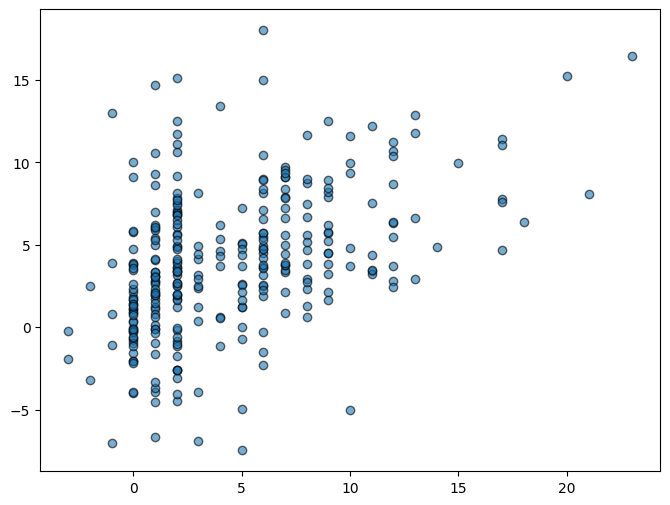

In [410]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_true_all, y_pred_all, alpha=0.6, edgecolor='k')



In [375]:
y_test.nunique()

9